# Final Project

## Bios512 final project 

**December 7th, 2022**

For this project, I chose to look at USDA data on honey bee colonies in the United States. 
This data provides information on honey bee colonies from 2015 - 2021. 

In [1]:
library('tidyverse') 
library('ggplot2')
install.packages("tidytuesdayR") 
library('scales')
colony <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-01-11/colony.csv')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
Warning message:
“package ‘stringr’ was built under R version 4.2.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Rows: 1222 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): months, state
dbl (8): year, colony_n, colony_max, colony_lost, colony_lost_pct, colony_ad...

ℹ Use `spec()` to retrieve the full column specification for this 

In [ ]:
I began by examining the colony data, and saw that there were seasonal measurements for each year from 2015 - 2021, for every state in the U.S. 

In [2]:
colony |> head() 

year,months,state,colony_n,colony_max,colony_lost,colony_lost_pct,colony_added,colony_reno,colony_reno_pct
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015,January-March,Alabama,7000,7000,1800,26,2800,250,4
2015,January-March,Arizona,35000,35000,4600,13,3400,2100,6
2015,January-March,Arkansas,13000,14000,1500,11,1200,90,1
2015,January-March,California,1440000,1690000,255000,15,250000,124000,7
2015,January-March,Colorado,3500,12500,1500,12,200,140,1
2015,January-March,Connecticut,3900,3900,870,22,290,NA,NA


Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


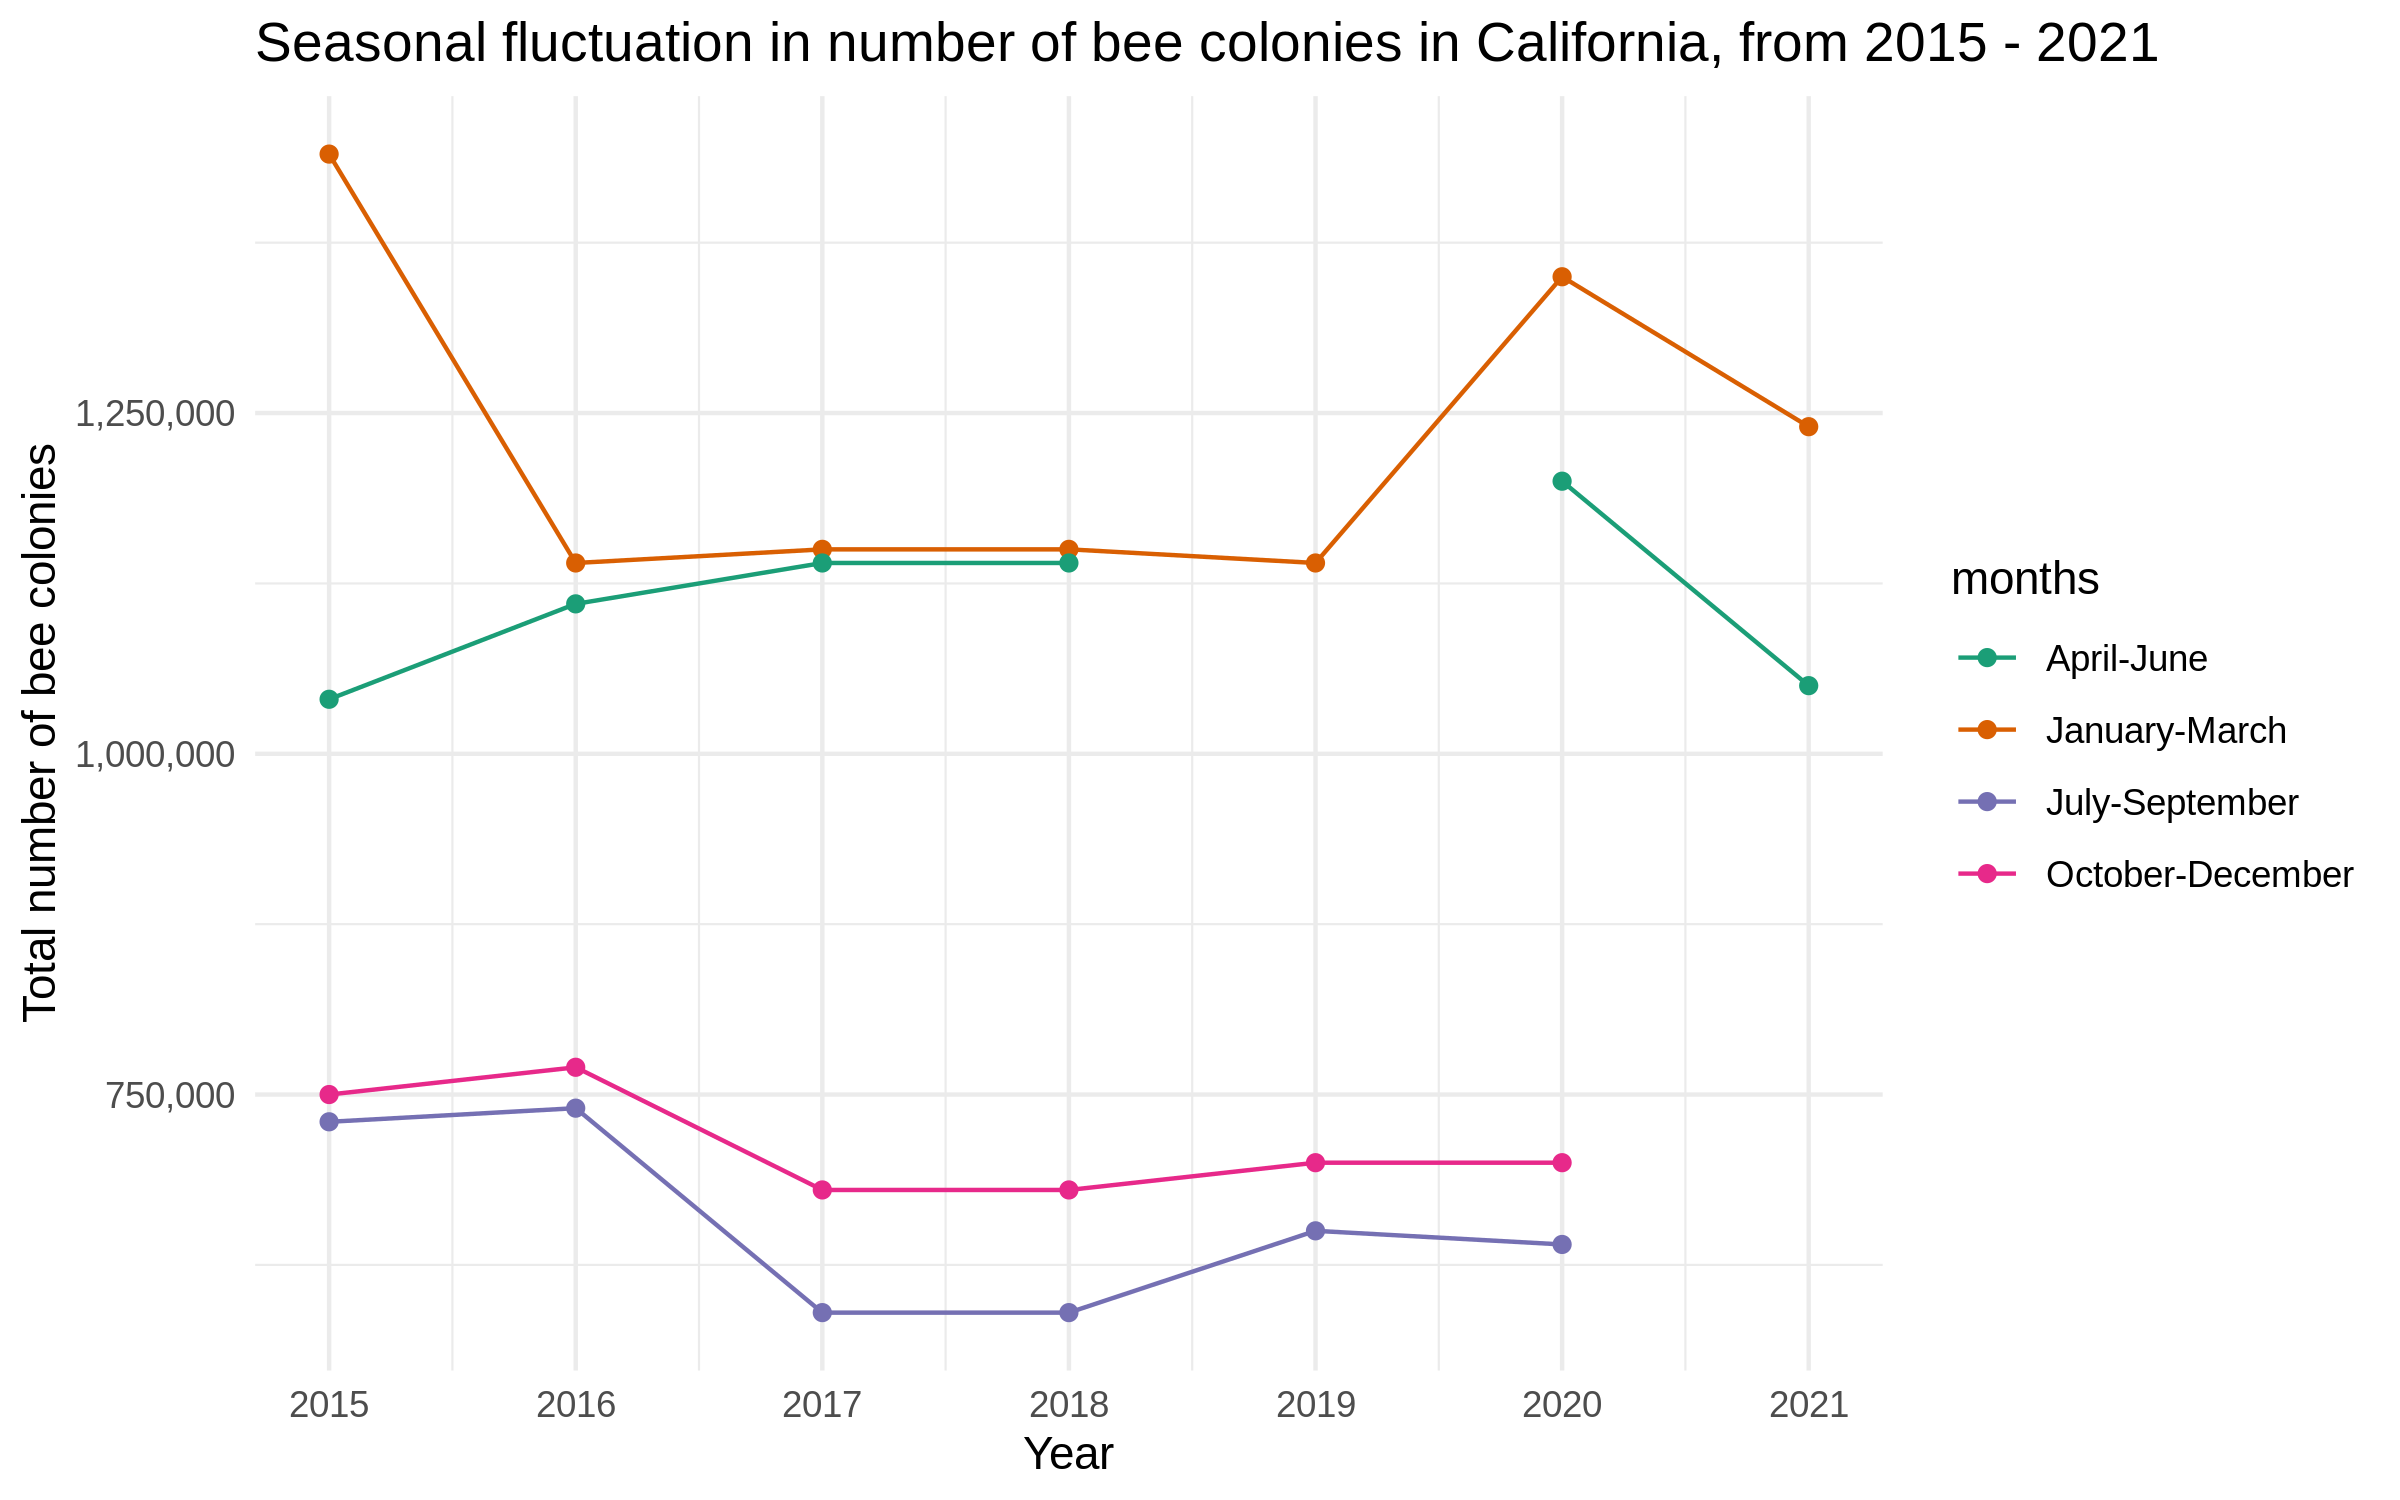

In [35]:
#Given that California has the largest bee population in the state, let's look at how the bee population changes by season, and over the years 
colony_ca = colony |> filter(state =="California", na.rm = TRUE)

options(repr.plot.width =8, repr.plot.height = 5)

p = ggplot(colony_ca, aes(x = year, y = colony_n, color = months)) + 
        geom_point() + 
        geom_line() + 
        scale_color_brewer(palette = 'Dark2') + 
        scale_fill_brewer(palette = 'Dark2') + 
        theme_minimal() + 
        labs(x = "Year", y = "Total number of bee colonies") + 
        scale_x_continuous(breaks = c(2015, 2016, 2017, 2018, 2019, 2020, 2021)) + 
        scale_y_continuous(labels = comma) +
        ggtitle("Seasonal fluctuation in number of bee colonies in California, from 2015 - 2021") 
p 

This graph shows interesting seasonal variation. Although some of the data for April - June appears to be missing, we can still see that there are a larger number of bee colonies present during the first six months of the year (late winter - early summer), than compared with the last six months of the year (late summer - early winter). I would assume this has something to do with the lifecycle of the bees. Although there are few data points from 2020 to 2021, there appears to be a drop in the bee population during this time. It would be interesting to look at the bee populations using the full dataset from all states, to see if this trend holds true. 

In [3]:
#Let's examine the percent of colonies lost and gained, per year, aggregated across all states 
tot_losses_gains_per_yr = colony |> 
    group_by(year) |> 
    #total number of colonies, across all states, in a given year 
    summarize(tot_colony_n = sum(colony_n, na.rm = TRUE),
        #losses
            #total number of colonies lost, across all states, in a given year 
                  tot_colony_lost = sum(colony_lost, na.rm = TRUE), 
            #total percent of colonies lost, across all states, in a given year 
                  tot_percent_col_lost = tot_colony_lost/tot_colony_n, 
        #gains 
            #total number of colonies gain, across all states, in a given year 
                  tot_colony_gain = sum(colony_added, na.rm = TRUE), 
    #total percent of colonies gained, per year, aggregated across all states 
                  tot_percent_col_gain = tot_colony_gain/tot_colony_n 
                   )
tot_losses_gains_per_yr |> head()

year,tot_colony_n,tot_colony_lost,tot_percent_col_lost,tot_colony_gain,tot_percent_col_gain
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015,23363500,3444720,0.1474402,2997960,0.12831810
2016,23218600,3316520,0.1428389,2914120,0.12550800
2017,22691780,2814400,0.1240273,3457180,0.15235385
2018,22303280,3034140,0.1360401,3443580,0.15439792
2019,17731080,2483820,0.1400828,1467040,0.08273833
2020,24339340,3097220,0.1272516,3387680,0.13918537


In [24]:
# Pivot the table to long format (to later allow for color encoding and a legend): 
tot_losses_gains_per_yr_pivot = tot_losses_gains_per_yr |> 
    pivot_longer(cols = c(tot_percent_col_lost, tot_percent_col_gain))

tot_losses_gains_per_yr_pivot |> head() 


year,tot_colony_n,tot_colony_lost,tot_colony_gain,name,value
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
2015,23363500,3444720,2997960,tot_percent_col_lost,0.1474402
2015,23363500,3444720,2997960,tot_percent_col_gain,0.1283181
2016,23218600,3316520,2914120,tot_percent_col_lost,0.1428389
2016,23218600,3316520,2914120,tot_percent_col_gain,0.1255080
2017,22691780,2814400,3457180,tot_percent_col_lost,0.1240273
2017,22691780,2814400,3457180,tot_percent_col_gain,0.1523538


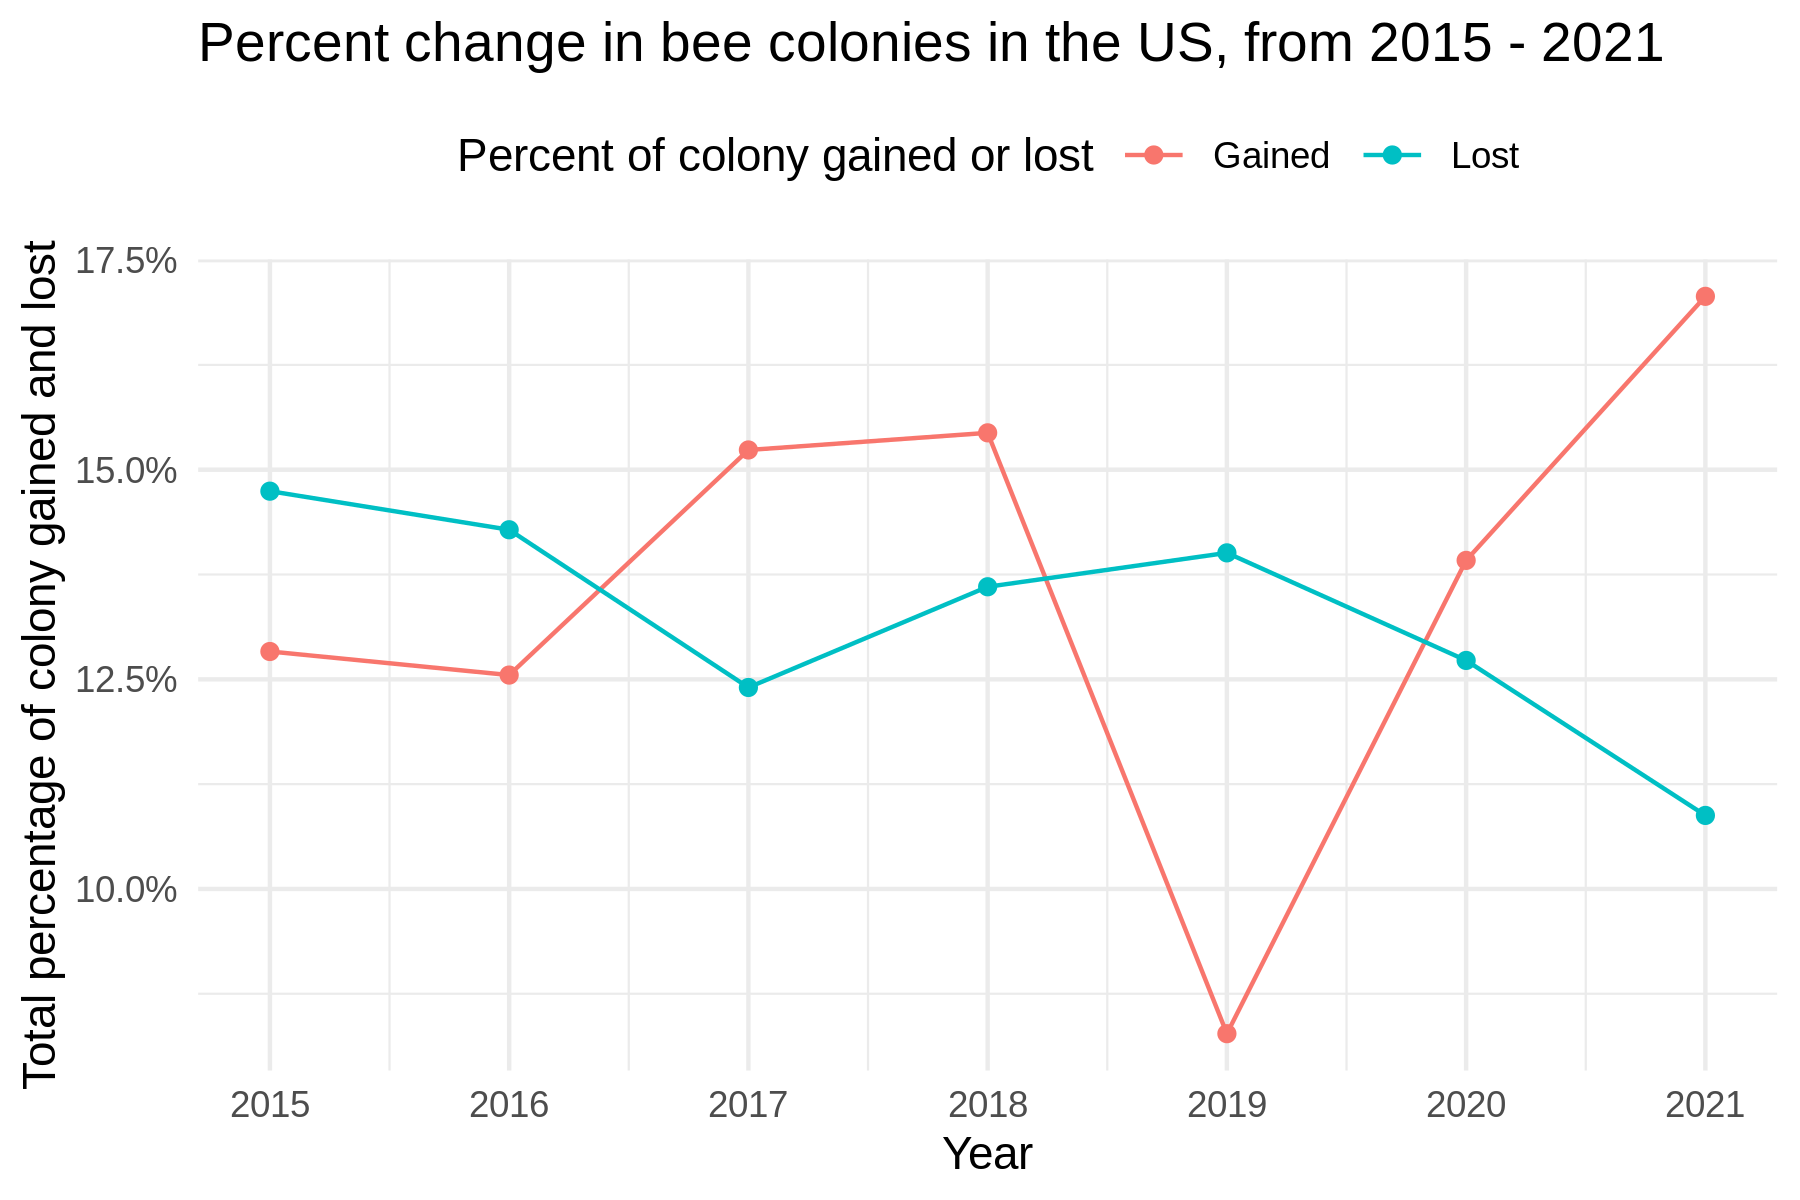

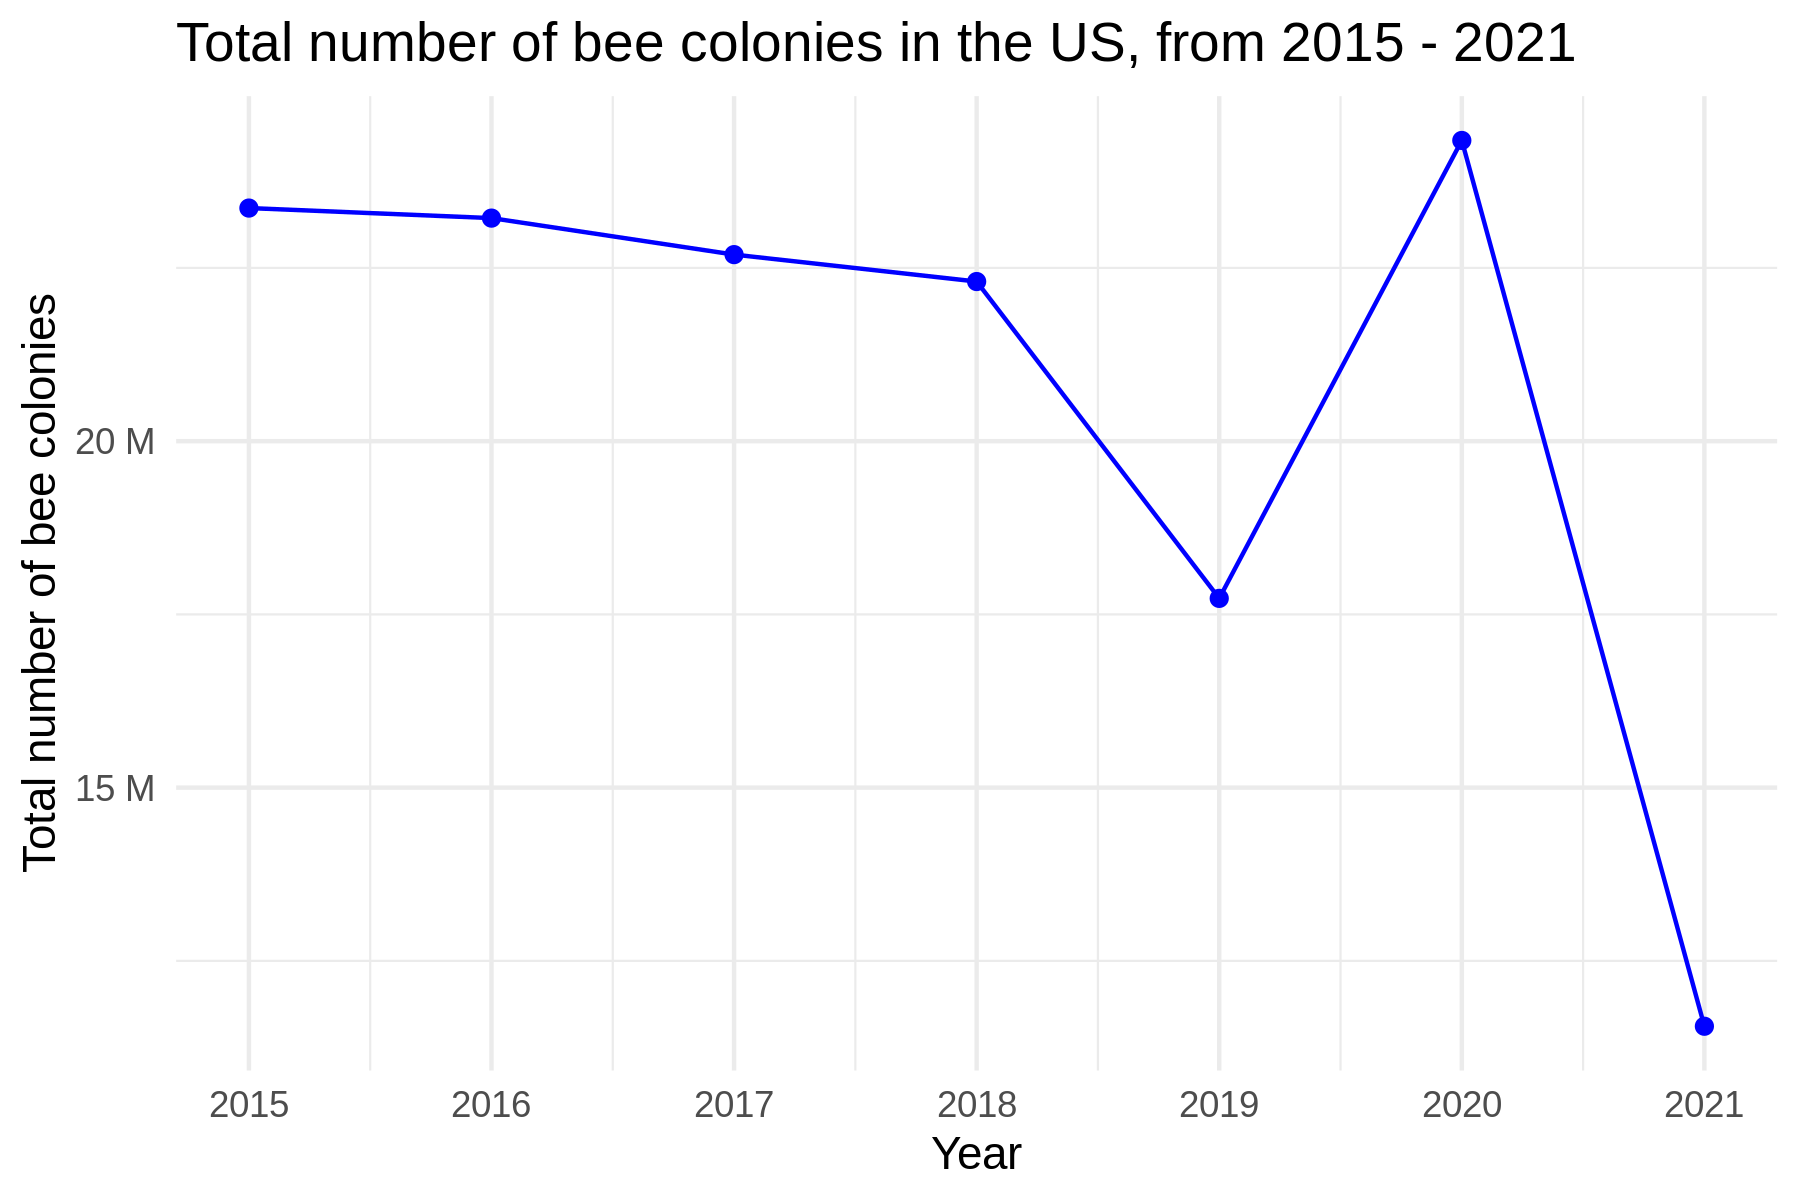

In [33]:
options(repr.plot.width =6, repr.plot.height = 4)

# Here we use your table to make the chart
p = ggplot(tot_losses_gains_per_yr_pivot, aes(x = year, y = value, color = name)) + 
        geom_point() +
        geom_line() +
        labs(x = "Year", y = "Total percentage of colony gained and lost") + 
        scale_x_continuous(breaks = c(2015, 2016, 2017, 2018, 2019, 2020, 2021)) + 
        ggtitle("Percent change in bee colonies in the US, from 2015 - 2021") + 
        scale_y_continuous(labels = scales::percent) + 
        theme_minimal() + 
        theme(legend.position = 'top')  +   
        scale_colour_discrete(name="Percent of colony gained or lost",
                            labels = c("Gained", "Lost"))
p 


#graph showing the total number of bee colonies over the years 
plot = ggplot(tot_losses_gains_per_yr, aes(x = year)) + 
        geom_line(aes(y = tot_colony_n), color = "blue") + 
        geom_point(aes(y = tot_colony_n), color = "blue") + 
        labs(x = "Year", y = "Total number of bee colonies") + 
        scale_x_continuous(breaks = c(2015, 2016, 2017, 2018, 2019, 2020, 2021)) + 
        scale_y_continuous(labels = label_number(suffix = " M", scale = 1e-6)) +
        ggtitle("Total number of bee colonies in the US, from 2015 - 2021") + 
        theme_minimal()  
plot


The first graph shows the percent of bee colonies gained and lost between 2015 - 2021, in the United States. The second shows the total number of bee colonies over the same time period. By overlaying these graphs, we can see the percent change and net change overtime. Between 2015 - 2018, the colonies held relatively steady, with a similar percentage of bee colonies gained and lost each year. The result was a small net decline in total bee colonies -- from approximately 23 million to  22 million respectively. In 2019 however, there was a large drop in the total number of bee colonies in the country, and this was primarily result of the fact that fewer colonies were gained in 2019, relative to previous years. As a result, the total population of bee colonies dropped significantly - to approximately 17 million. While there was an increase in colonies gained, and a decrease in colonies lost in the subsequent two years, the overall percent change was still insufficient to make up for the dramatic loss in the populations in 2019. As a result, the total number of bee colonies in 2021 is significantly lower than in 2015 (approximately 11.6 million vs. 23 million, respectively). That's a alarming drop of nearly 50% over the course of seven years. 